Целевая функция при рандомном управлении:  13284.16585728616


D:\Anaconda\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '




 Целевая функция после функции Беллмана:  13619.76892256053 




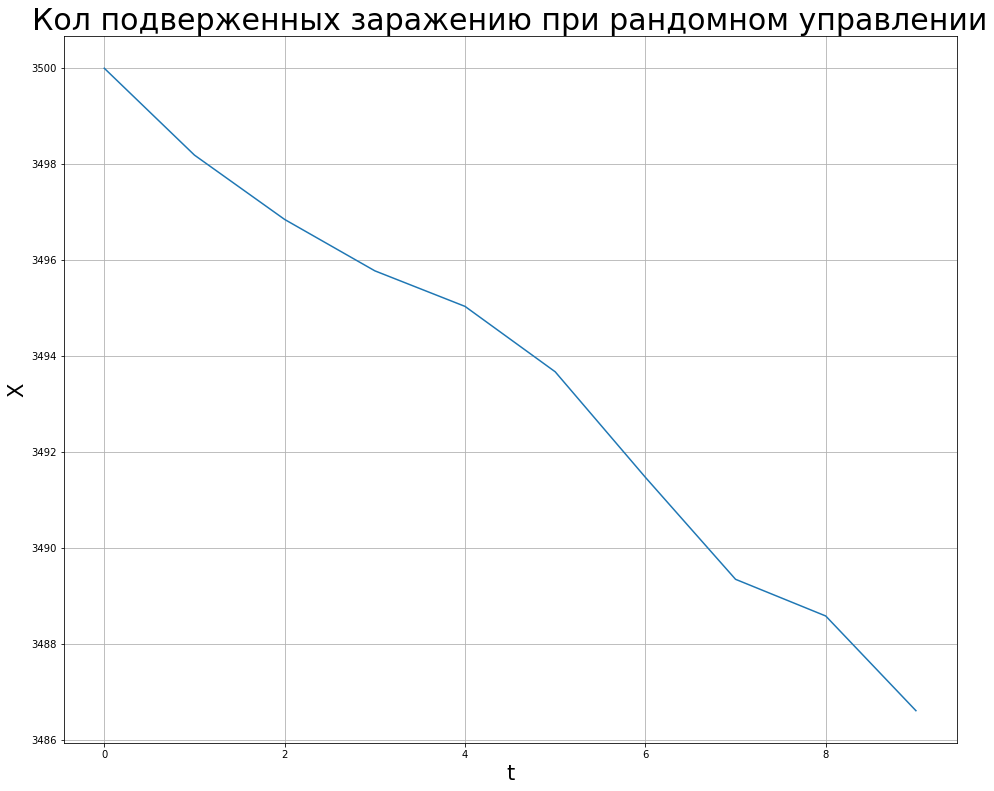

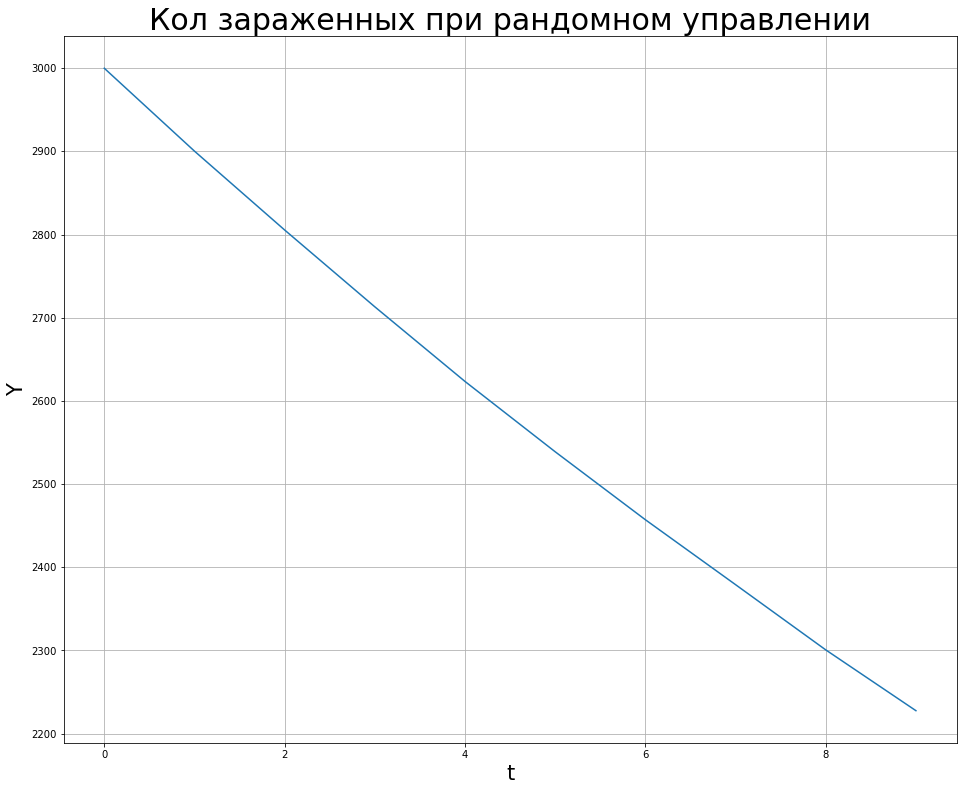

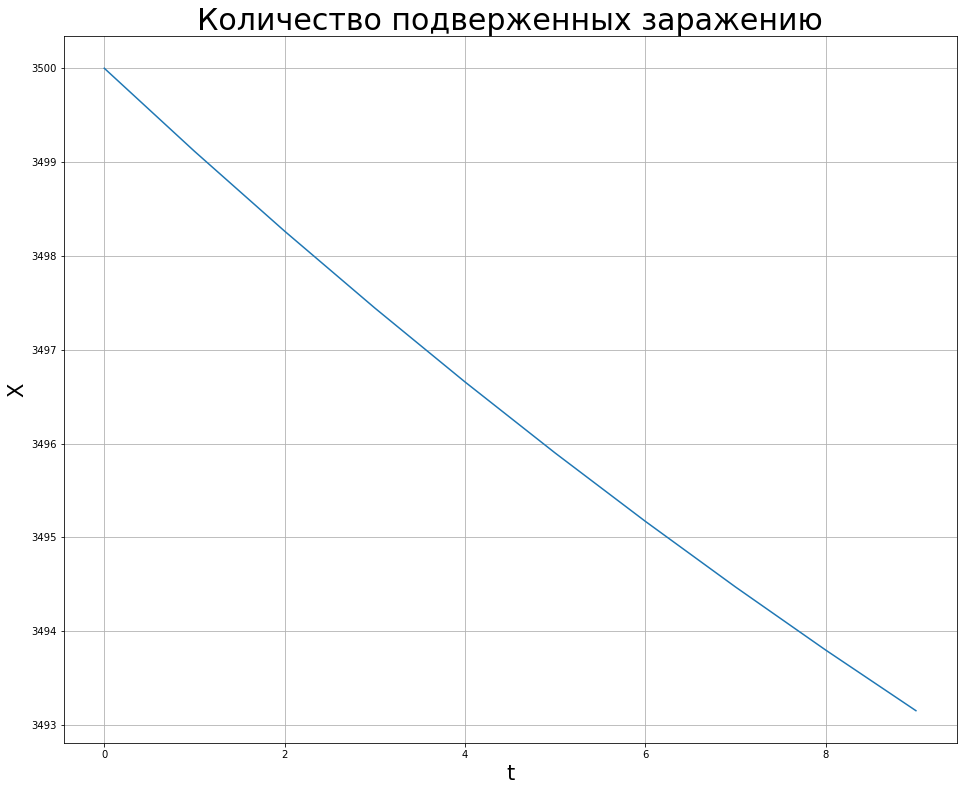

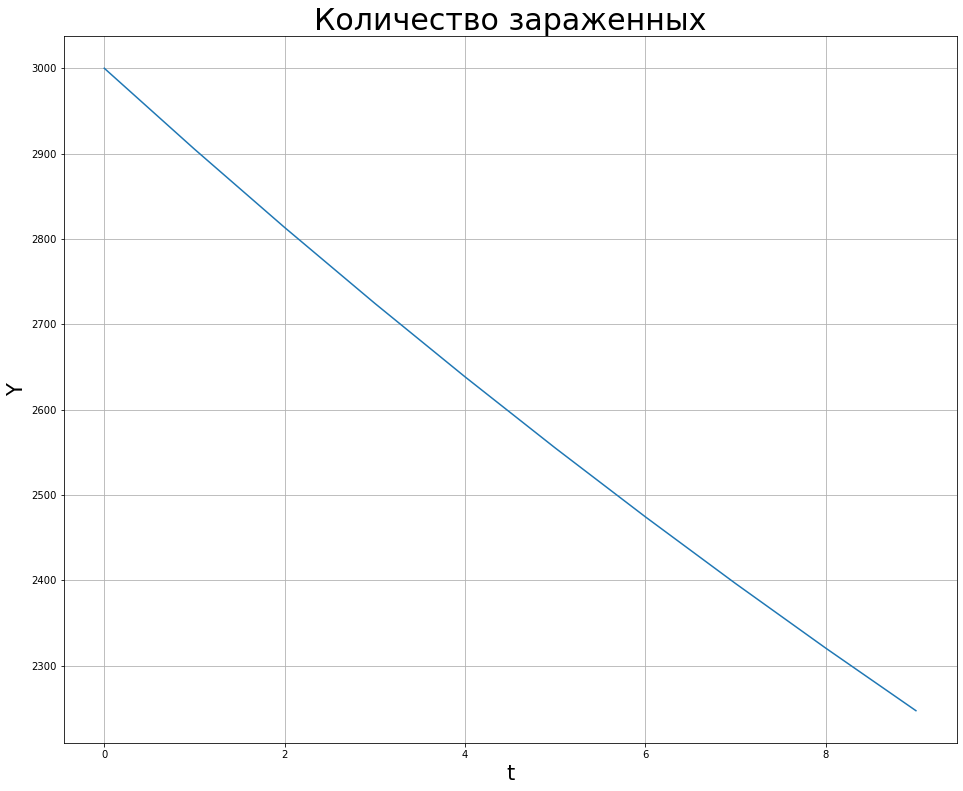

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.optimize import minimize
from scipy.optimize import linprog

x_0 = 3500;
y_0 = 3000;

d = 0.01;
b = 5;
l = 0.001;
c = 10#/10/50
beta = 0.000001;
lymda = 2;
mu = 0.0001;
mu_2 = 0.02;
gamma = 0.3;
T = 1;
q = 10;
y_q = 0;

del_t = T/q;

y = np.array(range(q), float);
x = np.array(range(q), float);
w = np.array(range(q), float);
v = np.array(range(q), float);
u = np.array(range(q), float);

B = np.array(range(q), float);
A_b = np.array(range(q), float);

#расчёт x_i  y_i
def X_Y(w,v,u):
    x[0] = x_0;
    y[0] = y_0;
    for i in range(0,q-1,1):
        x[i+1] = x[i] + del_t * (-x[i] * ( 1 - w[i]) * beta * y[i] - mu * x[i] + lymda - v[i]);
        y[i+1] = y[i] + del_t * (x[i] * ( 1 - w[i]) * beta * y[i] - (mu + mu_2 +gamma) * y[i] + lymda - u[i]);
    return x,y

#целевая функция
def I(y,x,u,w,v):
    I_sum = 0;
    for i in range(q-1):
        I_sum = I_sum + (y[i] - d * v[i] - c * u[i] - l * w[i] * x[i]);
    I_sum = I_sum * del_t + b * y[q-1];
    return I_sum

#функция Беллмана
def Bel_2(x_1, y_1, z_1):
    return (y[q-2] + d * x_1 + c * z_1 + l * y_1 * x[q-2]) * del_t + b * y[q-2]

def Bel_3(x_1, y_1, z_1):
    return ((y[q-3] + d * x_1 + c * z_1 + l * y_1 * x[q-3]) * del_t + (y[q-3] + d * x_1 + c * z_1 + l * y_1 * x[q-3]) * del_t 
            + b * y[q-3])

def Bel_4(x_1, y_1, z_1):
    return ((y[q-4] + d * x_1 + c * z_1 + l * y_1 * x[q-4]) * del_t + ((y[q-4] + d * x_1 + c * z_1 + l * y_1 * x[q-4]) * del_t
            + (y[q-4] + d * x_1 + c * z_1 + l * y_1 * x[q-4]) * del_t + b * y[q-4]))

def Bel_5(x_1, y_1, z_1):
    return ((y[q-5] + d * x_1 + c * z_1 + l * y_1 * x[q-5]) * del_t + ((y[q-5] + d * x_1 + c * z_1 + l * y_1 * x[q-5]) * del_t 
            + ((y[q-5] + d * x_1 + c * z_1 + l * y_1 * x[q-5]) * del_t + (y[q-5] + d * x_1 + c * z_1 + l * y_1 * x[q-5]) * del_t
            + b * y[q-5])))

def Bel_6(x_1, y_1, z_1):
    return ((y[q-6] + d * x_1 + c * z_1 + l * y_1 * x[q-6]) * del_t + ((y[q-6] + d * x_1 + c * z_1 + l * y_1 * x[q-6]) * del_t 
           + ((y[q-6] + d * x_1 + c * z_1 + l * y_1 * x[q-6]) * del_t + ((y[q-6] + d * x_1 + c * z_1 + l * y_1 * x[q-6]) * del_t
           + (y[q-6] + d * x_1 + c * z_1 + l * y_1 * x[q-6]) * del_t + b * y[q-6]))))

def Bel_7(x_1, y_1, z_1):
    return ((y[q-7] + d * x_1 + c * z_1 + l * y_1 * x[q-7]) * del_t + ((y[q-7] + d * x_1 + c * z_1 + l * y_1 * x[q-7]) * del_t
           + ((y[q-7] + d * x_1 + c * z_1 + l * y_1 * x[q-7]) * del_t + ((y[q-7] + d * x_1 + c * z_1 + l * y_1 * x[q-7]) * del_t
           + ((y[q-7] + d * x_1 + c * z_1 + l * y_1 * x[q-7]) * del_t + (y[q-7] + d * x_1 + c * z_1 + l * y_1 * x[q-7]) * del_t
           + b * y[q-7])))))

def Bel_8(x_1, y_1, z_1):
    return ((y[q-8] + d * x_1 + c * z_1 + l * y_1 * x[q-8]) * del_t + ((y[q-8] + d * x_1 + c * z_1 + l * y_1 * x[q-8]) * del_t 
           + ((y[q-8] + d * x_1 + c * z_1 + l * y_1 * x[q-8]) * del_t + ((y[q-8] + d * x_1 + c * z_1 + l * y_1 * x[q-8]) * del_t
           + ((y[q-8] + d * x_1 + c * z_1 + l * y_1 * x[q-8]) * del_t + ((y[q-8] + d * x_1 + c * z_1 + l * y_1 * x[q-8]) * del_t
           + (y[q-8] + d * x_1 + c * z_1 + l * y_1 * x[q-8]) * del_t + b * y[q-8]))))))

def Bel_9(x_1, y_1, z_1):
    return ((y[q-9] + d * x_1 + c * z_1 + l * y_1 * x[q-9]) * del_t + ((y[q-9] + d * x_1 + c * z_1 + l * y_1 * x[q-9]) * del_t 
           + ((y[q-9] + d * x_1 + c * z_1 + l * y_1 * x[q-9]) * del_t + ((y[q-9] + d * x_1 + c * z_1 + l * y_1 * x[q-9]) * del_t
           + ((y[q-9] + d * x_1 + c * z_1 + l * y_1 * x[q-9]) * del_t + ((y[q-9] + d * x_1 + c * z_1 + l * y_1 * x[q-9]) * del_t
           + ((y[q-9] + d * x_1 + c * z_1 + l * y_1 * x[q-9]) * del_t + (y[q-9] + d * x_1 + c * z_1 + l * y_1 * x[q-9]) * del_t 
           + b * y[q-9])))))))

def Bel_10(x_1, y_1, z_1):
    return ((y[q-10] + d * x_1 + c * z_1 + l * y_1 * x[q-10]) * del_t + ((y[q-10] + d * x_1 + c * z_1 + l * y_1 * x[q-10]) * del_t 
           + ((y[q-10] + d * x_1 + c * z_1 + l * y_1 * x[q-10]) * del_t + ((y[q-10] + d * x_1 + c * z_1 + l * y_1 * x[q-10]) * del_t
           + ((y[q-10] + d * x_1 + c * z_1 + l * y_1 * x[q-10]) * del_t + ((y[q-10] + d * x_1 + c * z_1 + l * y_1 * x[q-10]) * del_t
           + ((y[q-10] + d * x_1 + c * z_1 + l * y_1 * x[q-10]) * del_t + ((y[q-10] + d * x_1 + c * z_1 + l * y_1 * x[q-10]) * del_t
           + (y[q-10] + d * x_1 + c * z_1 + l * y_1 * x[q-10]) * del_t + b * y[q-10]))))))))        


def fun2(x_1):
    return Bel_2(*x_1)
def fun3(x_1):
    return Bel_3(*x_1)
def fun4(x_1):
    return Bel_4(*x_1)
def fun5(x_1):
    return Bel_5(*x_1)
def fun6(x_1):
    return Bel_6(*x_1)
def fun7(x_1):
    return Bel_7(*x_1)
def fun8(x_1):
    return Bel_8(*x_1)
def fun9(x_1):
    return Bel_9(*x_1)
def fun10(x_1):
    return Bel_10(*x_1)

#1 этап - Функция Беллмана по убывающему индексу
def Bellman(y):    
    B[q-1] = b * y[q-1];
    x0 = (0, 0, 0)
    res = minimize(fun2,x0,method="trust-constr",bounds = ((0, 20),(0, 0.2),(0,50)))
    w[q-2] = res.x[1]
    v[q-2] = res.x[0]
    u[q-2] = res.x[2]
    res = minimize(fun3,x0,method="trust-constr",bounds = ((0, 20),(0, 0.2),(0,50)))
    w[q-3] = res.x[1]
    v[q-3] = res.x[0]
    u[q-3] = res.x[2]
    res = minimize(fun4,x0,method="trust-constr",bounds = ((0, 20),(0, 0.2),(0,50)))
    w[q-4] = res.x[1]
    v[q-4] = res.x[0]
    u[q-4] = res.x[2]
    res = minimize(fun5,x0,method="trust-constr",bounds = ((0, 20),(0, 0.2),(0,50)))
    w[q-5] = res.x[1]
    v[q-5] = res.x[0]
    u[q-5] = res.x[2]
    res = minimize(fun6,x0,method="trust-constr",bounds = ((0, 20),(0, 0.2),(0,50)))
    w[q-6] = res.x[1]
    v[q-6] = res.x[0]
    u[q-6] = res.x[2]
    res = minimize(fun7,x0,method="trust-constr",bounds = ((0, 20),(0, 0.2),(0,50)))
    w[q-7] = res.x[1]
    v[q-7] = res.x[0]
    u[q-7] = res.x[2]
    res = minimize(fun8,x0,method="trust-constr",bounds = ((0, 20),(0, 0.2),(0,50)))
    w[q-8] = res.x[1]
    v[q-8] = res.x[0]
    u[q-8] = res.x[2]
    res = minimize(fun9,x0,method="trust-constr",bounds = ((0, 20),(0, 0.2),(0,50)))
    w[q-9] = res.x[1]
    v[q-9] = res.x[0]
    u[q-9] = res.x[2]
    res = minimize(fun10,x0,method="trust-constr",bounds = ((0, 20),(0, 0.2),(0,50)))
    w[q-10] = res.x[1]
    v[q-10] = res.x[0]
    u[q-10] = res.x[2]
    B[q-10] = ((y[q-10] + d * v[q-10] + c * u[q-10] + l * w[q-10] * x[q-10]) * del_t + 
              ((y[q-10] + d * v[q-10] + c * u[q-10] + l * w[q-10] * x[q-10]) * del_t + 
              ((y[q-10] + d * v[q-10] + c * u[q-10] + l * w[q-10] * x[q-10]) * del_t + 
              ((y[q-10] + d * v[q-10] + c * u[q-10] + l * w[q-10] * x[q-10]) * del_t +
              ((y[q-10] + d * v[q-10] + c * u[q-10] + l * w[q-10] * x[q-10]) * del_t + 
              ((y[q-10] + d * v[q-10] + c * u[q-10] + l * w[q-10] * x[q-10]) * del_t +
              ((y[q-10] + d * v[q-10] + c * u[q-10] + l * w[q-10] * x[q-10]) * del_t + 
              ((y[q-10] + d * v[q-10] + c * u[q-10] + l * w[q-10] * x[q-10]) * del_t +
               (y[q-10] + d * v[q-10] + c * u[q-10] + l * w[q-10] * x[q-10]) * del_t + b * y[q-10]))))))))
    return B,w,v,u

#НАЧАЛО ОСНОВНОЙ ПРОГРАММЫ
u = np.array([random.randint(0,50) for i in range(q)]);
v = np.array([random.randint(0,20) for i in range(q)]);
w = np.array([random.uniform(0,0.2) for i in range(q)]);

x, y = X_Y(w,v,u);
sum1 = I(y,x,u,w,v);

print('Целевая функция при рандомном управлении: ',sum1)

fig, ax = plt.subplots();
fig.set_figwidth(16)
fig.set_figheight(13)    
ax.plot(x)
ax.set_xlabel('t',fontsize = 21)
ax.set_ylabel('X',fontsize = 21)
ax.set_title('Кол подверженных заражению при рандомном управлении',fontsize =30);
ax.grid()

fig1, ax1 = plt.subplots();
fig1.set_figwidth(16)
fig1.set_figheight(13)    
ax1.plot(y)
ax1.set_xlabel('t',fontsize = 21)
ax1.set_ylabel('Y',fontsize = 21)
ax1.set_title('Кол зараженных при рандомном управлении',fontsize =30);
ax1.grid()

      
B,w,v,u = Bellman(y);
x, y = X_Y(w,v,u);

sum2 = I(y,x,u,w,v);
print('\n\n','Целевая функция после функции Беллмана: ',sum2,'\n\n')

fig2, ax2 = plt.subplots();
fig2.set_figwidth(16)    #  ширина и
fig2.set_figheight(13)    #  высота "Figure"
ax2.plot(x)
ax2.set_xlabel('t',fontsize = 21)
ax2.set_ylabel('X',fontsize = 21)
ax2.set_title('Количество подверженных заражению',fontsize =30);
ax2.grid()

fig3, ax3 = plt.subplots();
fig3.set_figwidth(16)    #  ширина и
fig3.set_figheight(13)    #  высота "Figure"
ax3.plot(y)
ax3.set_xlabel('t',fontsize = 21)
ax3.set_ylabel('Y',fontsize = 21)
ax3.set_title('Количество зараженных',fontsize =30);
ax3.grid()
